In [1]:
%autoreload 2

In [2]:
import ajc
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def simpleq(n):
    Q = np.zeros((n,n))
    np.fill_diagonal(Q[1:,:], 1)
    np.fill_diagonal(Q[:,1:], 1)
    np.fill_diagonal(Q, -np.sum(Q, axis=1))
    return Q

array([[-1.,  1.,  0.],
       [ 1., -2.,  1.],
       [ 0.,  1., -1.]])

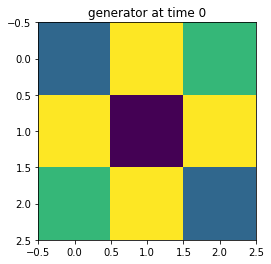

In [4]:
nx = 3
nt = 100
dt = 0.01

dts = np.array([dt for i in range(nt)])
#dts[-1] = 100
Qs = np.dstack([simpleq(nx) for i in range(nt)])

plt.title("generator at time 0")
plt.imshow(Qs[:,:,0])
Qs[:,:,0]

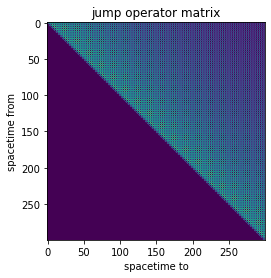

In [5]:
j1 = ajc.AJCGalerkin(Qs, dts)
plt.title("jump operator matrix")
plt.xlabel("spacetime to")
plt.ylabel("spacetime from")
plt.imshow(j1.km)

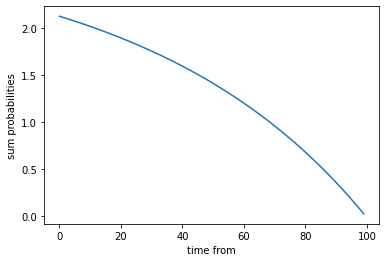

In [6]:
plt.xlabel("time from")
plt.ylabel("sum probabilities")
plt.plot(j1.k.sum(axis=(0,2,3)))

In [7]:
p=np.zeros((nx, nt))
p[0,0]=.5
p[-2,0]=.5

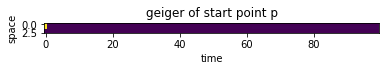

In [8]:
g = j1.geiger(p)
plt.xlabel("time")
plt.ylabel("space")
plt.title("geiger of start point p")
plt.imshow(g)

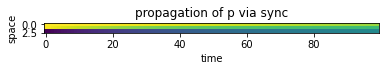

In [9]:
s = j1.synchronize(g)
plt.xlabel("time")
plt.ylabel("space")
plt.title("propagation of p via sync")
plt.imshow(s)

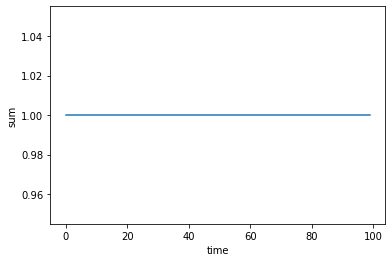

In [10]:
plt.ylabel("sum"); plt.xlabel("time")
plt.plot(s.sum(axis=0))

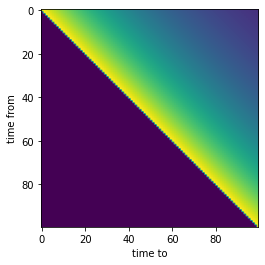

In [11]:
S = j1.holding_probs()
plt.ylabel("time from")
plt.xlabel("time to")
plt.imshow(S[1,:,:])

# Committors

## New koopman algorithm

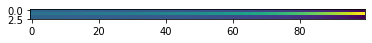

In [12]:
nxt = j1.k.shape[0] * j1.k.shape[1]
inds_bnd = np.zeros(nxt, dtype=bool)
inds_bnd[-nx:] = True

g = np.zeros(nx)
g[1] = 1

c = j1.unflatten(j1.commitor(g, inds_bnd))
plt.imshow(c)

In [13]:
# TODO: this should be ones...
c.sum(axis=0)

array([1.01989947, 1.01989945, 1.01989942, 1.01989939, 1.01989936,
       1.01989933, 1.0198993 , 1.01989927, 1.01989924, 1.01989921,
       1.01989917, 1.01989914, 1.0198991 , 1.01989906, 1.01989902,
       1.01989898, 1.01989894, 1.0198989 , 1.01989886, 1.01989881,
       1.01989877, 1.01989872, 1.01989867, 1.01989862, 1.01989857,
       1.01989851, 1.01989846, 1.0198984 , 1.01989834, 1.01989828,
       1.01989822, 1.01989815, 1.01989809, 1.01989802, 1.01989795,
       1.01989788, 1.0198978 , 1.01989772, 1.01989765, 1.01989756,
       1.01989748, 1.01989739, 1.0198973 , 1.01989721, 1.01989712,
       1.01989702, 1.01989692, 1.01989681, 1.01989671, 1.01989659,
       1.01989648, 1.01989636, 1.01989624, 1.01989612, 1.01989599,
       1.01989586, 1.01989572, 1.01989558, 1.01989544, 1.01989529,
       1.01989513, 1.01989498, 1.01989481, 1.01989464, 1.01989447,
       1.01989429, 1.01989411, 1.01989392, 1.01989372, 1.01989352,
       1.01989331, 1.0198931 , 1.01989288, 1.01989265, 1.01989

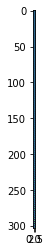

In [14]:
c2 = j1.koopman_commitor()
plt.imshow(c2)

In [15]:
c[:,0]

array([0.32278014, 0.37433919, 0.32278014])

array([[0.52661898, 0.31648703, 0.15689399],
       [0.31648746, 0.36702509, 0.31648746],
       [0.15689399, 0.31648703, 0.52661898]])

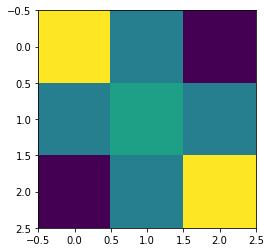

In [16]:
K2 = c2[:nx, :nx]
plt.imshow(K2)
K2

(2, 3)

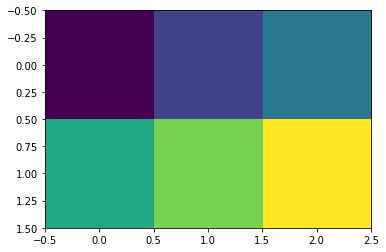

In [25]:
plt.imshow([[1,2,3],[4,5,6]])
np.shape([[1,2,3],[4,5,6]])

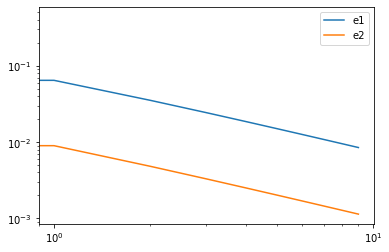

In [52]:
from scipy.linalg import expm

def approx_error(nt):
    nx = 3
    tmax = 1
    dt = tmax / nt

    dts = np.array([dt for i in range(nt)])
    Qs = np.dstack([simpleq(nx) for i in range(nt)])
    j = ajc.AJCGalerkin(Qs, dts)

    K = expm(Qs[:,:,0]*nt*dt)

    inds_bnd = np.zeros(nx*nt, dtype=bool)
    inds_bnd[-nx:] = True
    g = np.zeros(nx)
    g[1] = 1
    c1 = j.unflatten(j.commitor(g, inds_bnd))
    K1 = c1[:,0]

    e1 = np.max(abs(K1 - K[:,1]))

    c2 = j.koopman_commitor()
    K2 = c2[:nx, :nx]
    e2 = np.max(abs(K2 - K))

    return e1, e2, K, K1, K2

[a,b] = plt.plot([approx_error(i)[0:2] for i in np.arange(2,100,10)])
plt.legend([a,b], ["e1","e2"])
plt.yscale("log")
plt.xscale("log")

array([[0.5255709 , 0.31673764, 0.15769146],
       [0.31673764, 0.36652471, 0.31673764],
       [0.15769146, 0.31673764, 0.5255709 ]])

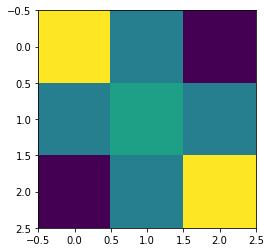

In [17]:

K3=
plt.imshow(K3)
K3

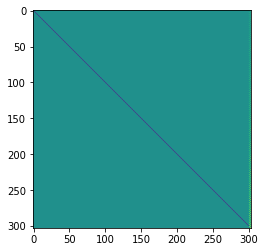

In [18]:
## debug koompan_committor matrix

self=j1
nx, nxt = self.nx, self.nxt
A_inner = self.km - np.identity(nxt)
s = np.sum(self.km, axis=1)

A = np.pad(A_inner, ((0, nx),(0, nx)))
A[nxt:, nxt:] = np.identity(nx)

for i in range(nxt):
    A[i, nxt + np.mod(i,nx)] = 1 - s[i]

b = np.zeros((nxt+nx, nx))
b[nxt:, :] = np.identity(nx)
plt.imshow(A)

In [19]:
# hitting probabilities for all states when starting from state 0 
[j1.finite_time_hitting_prob(i)[0] for i in range(nx)]

[1.0, 0.6302750149396639, 0.21199181106396367]

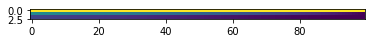

In [20]:
plt.imshow(j1.unflatten(j1.finite_time_hitting_prob(0)))